In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [2]:
%matplotlib inline

In [3]:
target_types={6:'Microlensing', 15:'Explosive Type V', 16:'Transits', 42:'Explosive type W', 52:'Explosive Type X', 
                  53:'Long periodic', 62:'Explosive Type Y', 64:'Near Burst', 65:'Flare', 67:'Explosive Type Z',
                  88:'AGN', 90:'SN Type U', 92:'Periodic', 95:'SN Type T'}

In [4]:
train_series = pd.read_csv('../input/training_set.csv')
train_metadata = pd.read_csv('../input/training_set_metadata.csv')

In [5]:
groups = train_series.groupby(['object_id', 'passband'])
times = groups.apply(
    lambda block: block['mjd'].values).reset_index().rename(columns={0: 'seq'})
flux = groups.apply(
    lambda block: block['flux'].values
).reset_index().rename(columns={0: 'seq'})
err = groups.apply(
    lambda block: block['flux_err'].values
).reset_index().rename(columns={0: 'seq'})
det = groups.apply(
    lambda block: block['detected'].astype(bool).values
).reset_index().rename(columns={0: 'seq'})
times_list = times.groupby('object_id').apply(lambda x: x['seq'].tolist()).tolist()
flux_list = flux.groupby('object_id').apply(lambda x: x['seq'].tolist()).tolist()
err_list = err.groupby('object_id').apply(lambda x: x['seq'].tolist()).tolist()
det_list = det.groupby('object_id').apply(lambda x: x['seq'].tolist()).tolist()

In [6]:
object_list=times.groupby('object_id').apply(lambda x: x['object_id'].unique()[0]).tolist()

In [7]:
colors = ['purple', 'blue', 'green', 'orange', 'red', 'black']

In [8]:
def plot_one_object(obj_id):
    
    for band in range(len(colors)):
        sample = train_series[(train_series['object_id'] == obj_id) & (train_series['passband']==band)]
        plt.errorbar(x=sample['mjd'],y=sample['flux'],yerr=sample['flux_err'],c = colors[band],fmt='o',alpha=0.7)


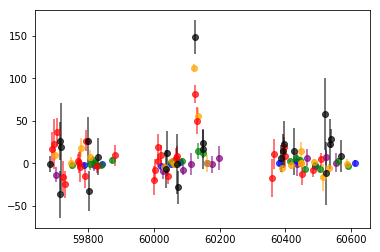

In [9]:
plot_one_object(20222858)
#plt.xlim(59900,60100)

## Periodicity

In [10]:
from astropy.stats import LombScargle

Text(0.5,1,'Periodic')

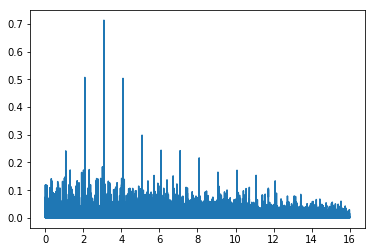

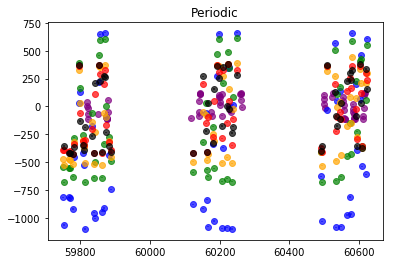

In [11]:
iobj=0
time_obj = np.concatenate(times_list[iobj])
flux_obj = np.concatenate(flux_list[iobj])
err_obj = np.concatenate(err_list[iobj])

frequency, power = LombScargle(time_obj, flux_obj,err_obj).autopower(maximum_frequency=16.0)
#frequency, power = LombScargle(times_list[iobj][1], flux_list[iobj][1],err_list[iobj][1]).autopower()
plt.plot(frequency, power)
plt.figure()
plot_one_object(object_list[iobj])
plt.title(target_types[train_metadata.loc[iobj,'target']])

In [12]:
sorted(train_metadata['target'].unique())

[6, 15, 16, 42, 52, 53, 62, 64, 65, 67, 88, 90, 92, 95]

In [13]:
for t in sorted(train_metadata['target'].unique()):
    print t,target_types[t],train_metadata[train_metadata['target']== t]['hostgal_specz'].mean()

6 Microlensing 0.0
15 Explosive Type V 0.243576767677
16 Transits 0.0
42 Explosive type W 0.229962447611
52 Explosive Type X 0.229706010929
53 Long periodic 0.0
62 Explosive Type Y 0.194970454545
64 Near Burst 0.0743980392157
65 Flare 0.0
67 Explosive Type Z 0.225448557692
88 AGN 0.967997027027
90 SN Type U 0.363081279723
92 Periodic 0.0
95 SN Type T 1.21743828571


In [14]:
train_metadata[train_metadata['target']== 92]

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0,0.0,0.0,NaN,0.017,92
69,12695,51.855469,-28.630989,224.733260,-55.649872,1,0.0,0.0,0.0,NaN,0.009,92
150,26161,359.415588,-46.768478,327.729895,-67.686097,1,0.0,0.0,0.0,NaN,0.009,92
156,26783,150.820312,1.641510,237.994507,42.358984,1,0.0,0.0,0.0,NaN,0.020,92
162,28391,351.953644,-62.132156,318.777388,-52.347124,1,0.0,0.0,0.0,NaN,0.019,92
183,31310,149.238281,3.882372,234.283829,42.351155,1,0.0,0.0,0.0,NaN,0.033,92
249,43509,51.855469,-27.953188,223.543603,-55.561470,1,0.0,0.0,0.0,NaN,0.008,92
281,49389,349.285706,-62.884678,319.786163,-51.046461,1,0.0,0.0,0.0,NaN,0.018,92
291,51987,352.711273,-63.823658,316.922299,-51.059403,1,0.0,0.0,0.0,NaN,0.024,92
354,61407,53.613281,-27.953188,223.929533,-54.024772,1,0.0,0.0,0.0,NaN,0.007,92


# Interpolation

In [15]:
# 231 bins in time... 
time_grid=(np.arange(59550,60705,5.))

## Kernel interpolation

(56, 60.96487765061239, 110.83772404860758)

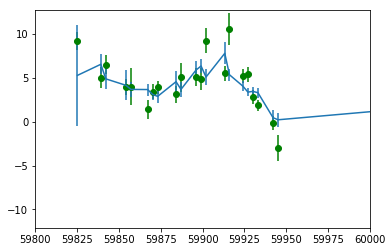

In [16]:

iobj=1
band=2
length=5.4
kernel=np.exp(-(np.reshape(times_list[iobj][band],(-1,1)) - times_list[iobj][band])**2/2/length**2)
np.fill_diagonal(kernel,0)
sumw=kernel.dot(1./err_list[iobj][band]**2)
pred=kernel.dot(flux_list[iobj][band]/err_list[iobj][band]**2) / sumw
chi2 = (pred - flux_list[iobj][band])**2 / ( err_list[iobj][band]**2 + 1./sumw )
logl = chi2 + np.log(err_list[iobj][band]**2 + 1./sumw)
plt.errorbar(times_list[iobj][band],flux_list[iobj][band],yerr=err_list[iobj][band],color=colors[band],fmt='o')
plt.errorbar(times_list[iobj][band],pred,yerr=1./np.sqrt(sumw))
plt.ylim(np.min(flux_list[iobj][band]*1.2,0),np.max(flux_list[iobj][band]*1.2,0))
plt.xlim(59800,60000)
len(sumw),np.sum(chi2),np.sum(logl)


In [17]:


def fit_kernel_params(times_band,flux_band,err_band):
    
    def _kernel_likelihood(params):
        sigma=params[0]
        length=params[1]
        kernel=np.exp(-(np.reshape(times_band,(-1,1)) - times_band)**2/2/length**2)
        np.fill_diagonal(kernel,0)
        sumw=kernel.dot(1./err_band**2) + 1./sigma**2
        pred=kernel.dot(flux_band/err_band**2) / sumw
        chi2 = (pred - flux_band)**2 / ( err_band**2 + 1./sumw )
        # -2 ln likelihood
        logl=np.sum(chi2 + np.log(err_band**2 + 1./sumw))
        return logl
    
    lguess=(np.max(times_band)-np.min(times_band))/len(times_band)
    siguess=np.std(flux_band)/2.
    output=optimize.fmin(_kernel_likelihood,(siguess,lguess),disp=False,xtol=0.01,full_output=1)
    return output[0], output[1]

def kernel_predict(params,times_band,flux_band,err_band):
    sigma=params[0]
    length=params[1]
    kernel=np.exp(-(np.reshape(time_grid,(-1,1)) - times_band)**2/2/length**2)
    sumw=kernel.dot(1./err_band**2) + 1./sigma**2
    pred=kernel.dot(flux_band/err_band**2) / sumw
    return pred, np.sqrt(1./sumw)
  


In [18]:
def make_kernel(tlist,flist,elist):
    flux_grid = []
    err_grid = []
    kernel_sigma = []
    kernel_length = []
    kernel_logl=[]
    for times_obj,flux_obj,err_obj in zip(tlist,flist,elist):
        flux_grid_obj=[]
        err_grid_obj=[]
        kernel_sigma_obj = []
        kernel_length_obj = []
        kernel_logl_obj=[]
        for times_band,flux_band,err_band in zip(times_obj,flux_obj,err_obj):
            (sigma,length),logl = fit_kernel_params(times_band,flux_band,err_band)
            k_flux,k_err=kernel_predict((sigma,length),times_band,flux_band,err_band)
            flux_grid_obj.append(k_flux)
            err_grid_obj.append(k_err)
            kernel_sigma_obj.append(sigma)
            kernel_length_obj.append(length)
            kernel_logl_obj.append(logl)
        flux_grid.append(flux_grid_obj)
        err_grid.append(err_grid_obj)
        kernel_sigma.append(kernel_sigma_obj)
        kernel_length.append(kernel_length_obj)
        kernel_logl.append(kernel_logl_obj)
    return flux_grid,err_grid, kernel_sigma, kernel_length,kernel_logl
        
        
    

In [19]:
#Remark : not fitting for the sigma accelerates by a factor 3 !
# but it will produce nans...
# The warning "divide by zero" seems to be harmless...
kernel_flux_grid,kernel_err_grid,kernel_sigma,kernel_length,kernel_logl=make_kernel(times_list,flux_list,err_list)

/opt/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in divide
  
/opt/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in divide
  
/opt/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


In [23]:
def plot_interpolations(iobj,times_list,flux_list,err_list,flux_grid,err_grid):
    fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12, 8))
    plt.title(target_types[train_metadata.loc[iobj,'target']]) 
    for band in range(6):
        ax = axes[band // 3, band % 3]
        ax.errorbar(times_list[iobj][band],flux_list[iobj][band],yerr=err_list[iobj][band],color=colors[band],fmt='o')
        ax.plot(time_grid,flux_grid[iobj][band],color=colors[band])
        ax.fill_between(time_grid,flux_grid[iobj][band]-err_grid[iobj][band],
                        flux_grid[iobj][band]+err_grid[iobj][band],alpha=0.3,color=colors[band])
        ax.set_xlabel('MJD')
        ax.set_ylabel('Flux')
    plt.title(target_types[train_metadata.loc[iobj,'target']])    

(60100, 60300)

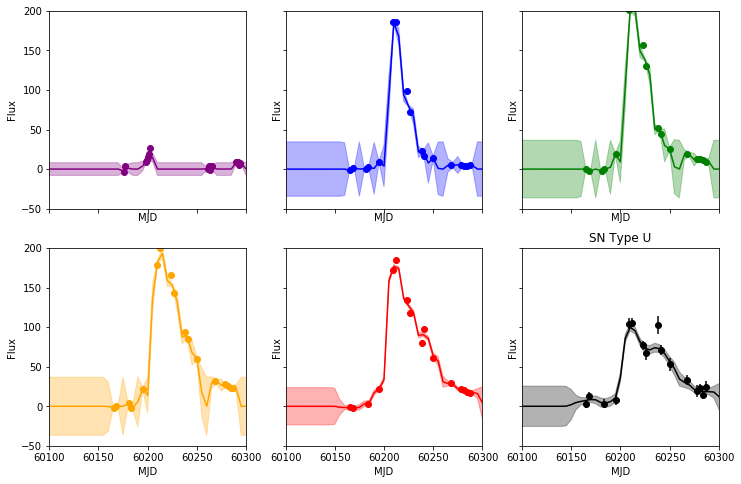

In [25]:
plot_interpolations(31,times_list,flux_list,err_list,kernel_flux_grid,kernel_err_grid)
plt.ylim(-50,200)
plt.xlim(60100,60300)

Parameters depend also on observation conditions

(-2, 3)

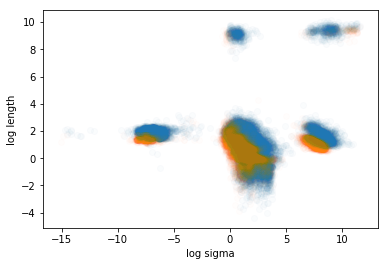

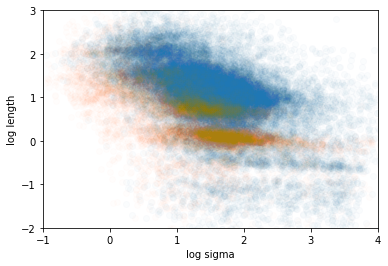

In [80]:
ddf = train_metadata['ddf']==1
plt.scatter(np.log10(np.abs(kernel_sigma))[ddf==0],np.log10(np.abs(kernel_length))[ddf==0],alpha=0.02)
plt.scatter(np.log10(np.abs(kernel_sigma))[ddf],np.log10(np.abs(kernel_length))[ddf],alpha=0.01)
plt.xlabel('log sigma')
plt.ylabel('log length')
plt.figure()
plt.scatter(np.log10(np.abs(kernel_sigma))[ddf==0],np.log10(np.abs(kernel_length))[ddf==0],alpha=0.02)
plt.scatter(np.log10(np.abs(kernel_sigma))[ddf],np.log10(np.abs(kernel_length))[ddf],alpha=0.01)
plt.xlabel('log sigma')
plt.ylabel('log length')
plt.xlim((-1,4))
plt.ylim(-2,3)
#plt.xlim()